In [3]:
# Digit Recogniser

## Imports

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import os

## Data

In [5]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


**Load data**

In [6]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

**Number of train samples by label**

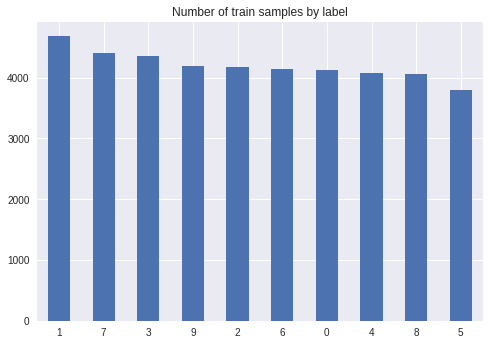

In [7]:
train.label.value_counts().plot.bar(rot=0,title='Number of train samples by label');

**Random Sample to Image**

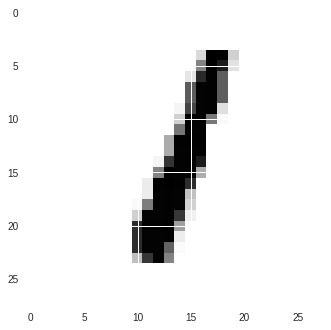

In [8]:
plt.imshow(train[train.columns[1:]].sample(1).values.ravel().reshape(28,28));

**Train / Test data**

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_, test_ = train_test_split(train,test_size=0.33,random_state=42,stratify=train.label)

**Check if the data it's fair splitted based on label**

In [11]:
'train',train_.label.value_counts() / len(train_),'test',test_.label.value_counts() / len(test_)

('train',
 1    0.111514
 7    0.104797
 3    0.103589
 9    0.099716
 2    0.099467
 6    0.098507
 0    0.098365
 4    0.096944
 8    0.096731
 5    0.090370
 Name: label, dtype: float64,
 'test',
 1    0.111544
 7    0.104762
 3    0.103608
 9    0.099711
 2    0.099423
 6    0.098485
 0    0.098413
 4    0.096970
 8    0.096753
 5    0.090332
 Name: label, dtype: float64)

**KNN**

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [13]:
%%time
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_[train_.columns[1:]],train_['label'])

CPU times: user 4.49 s, sys: 128 ms, total: 4.62 s
Wall time: 4.6 s


KNeighborsClassifier(n_neighbors=3)

In [ ]:
%%time
knn_results = test_.copy()
knn_results['y_pred'] = knn.predict(test_[test_.columns[1:]])

In [ ]:
print(metrics.classification_report(knn_results.label,knn_results.y_pred))

In [ ]:
sns.heatmap(metrics.confusion_matrix(knn_results.label,knn_results.y_pred),annot=True,fmt='d');

**XGBoost**

In [ ]:
import xgboost as xgb

In [ ]:
%%time
xgc = xgb.XGBClassifier(objective='multi:softmax',num_class=train.label.nunique(),n_estimators=300)
xgc.fit(train_[train_.columns[1:]],train_['label'],verbose=1000)

In [ ]:
%%time
xgc_results = test_.copy()
xgc_results['y_pred'] = xgc.predict(test_[test_.columns[1:]])

In [ ]:
print(metrics.classification_report(xgc_results.label,xgc_results.y_pred))

In [ ]:
sns.heatmap(metrics.confusion_matrix(xgc_results.label,xgc_results.y_pred),annot=True,fmt='d');

**Train on Full Data then create submission file**

In [ ]:
%%time
full_xgc = xgb.XGBClassifier(objective='multi:softmax',num_class=train.label.nunique(),n_estimators=300)
full_xgc.fit(train[train.columns[1:]],train['label'],verbose=1000)

In [ ]:
%%time
full_xgc_results = test.copy()
full_xgc_results['y_pred'] = full_xgc.predict(test)

In [ ]:
full_xgc_results['ImageId'] = list(range(1,len(test) + 1))
full_xgc_results[['ImageId','y_pred']].rename(columns={'y_pred':'label'}).to_csv('submission.csv',index=False)